In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, roc_curve, auc, r2_score
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [100]:
tensorflow_data = r"E:\Koulujutut\AIDA_projekti\aida-projekti-syksy-2024-ryhma-1\docs\us_used_cars\tensorflow_preprocessed.csv"

In [101]:
tf_df = pd.read_csv(tensorflow_data)
tf_df = tf_df.drop(columns=["daysonmarket", "dealer_zip"])

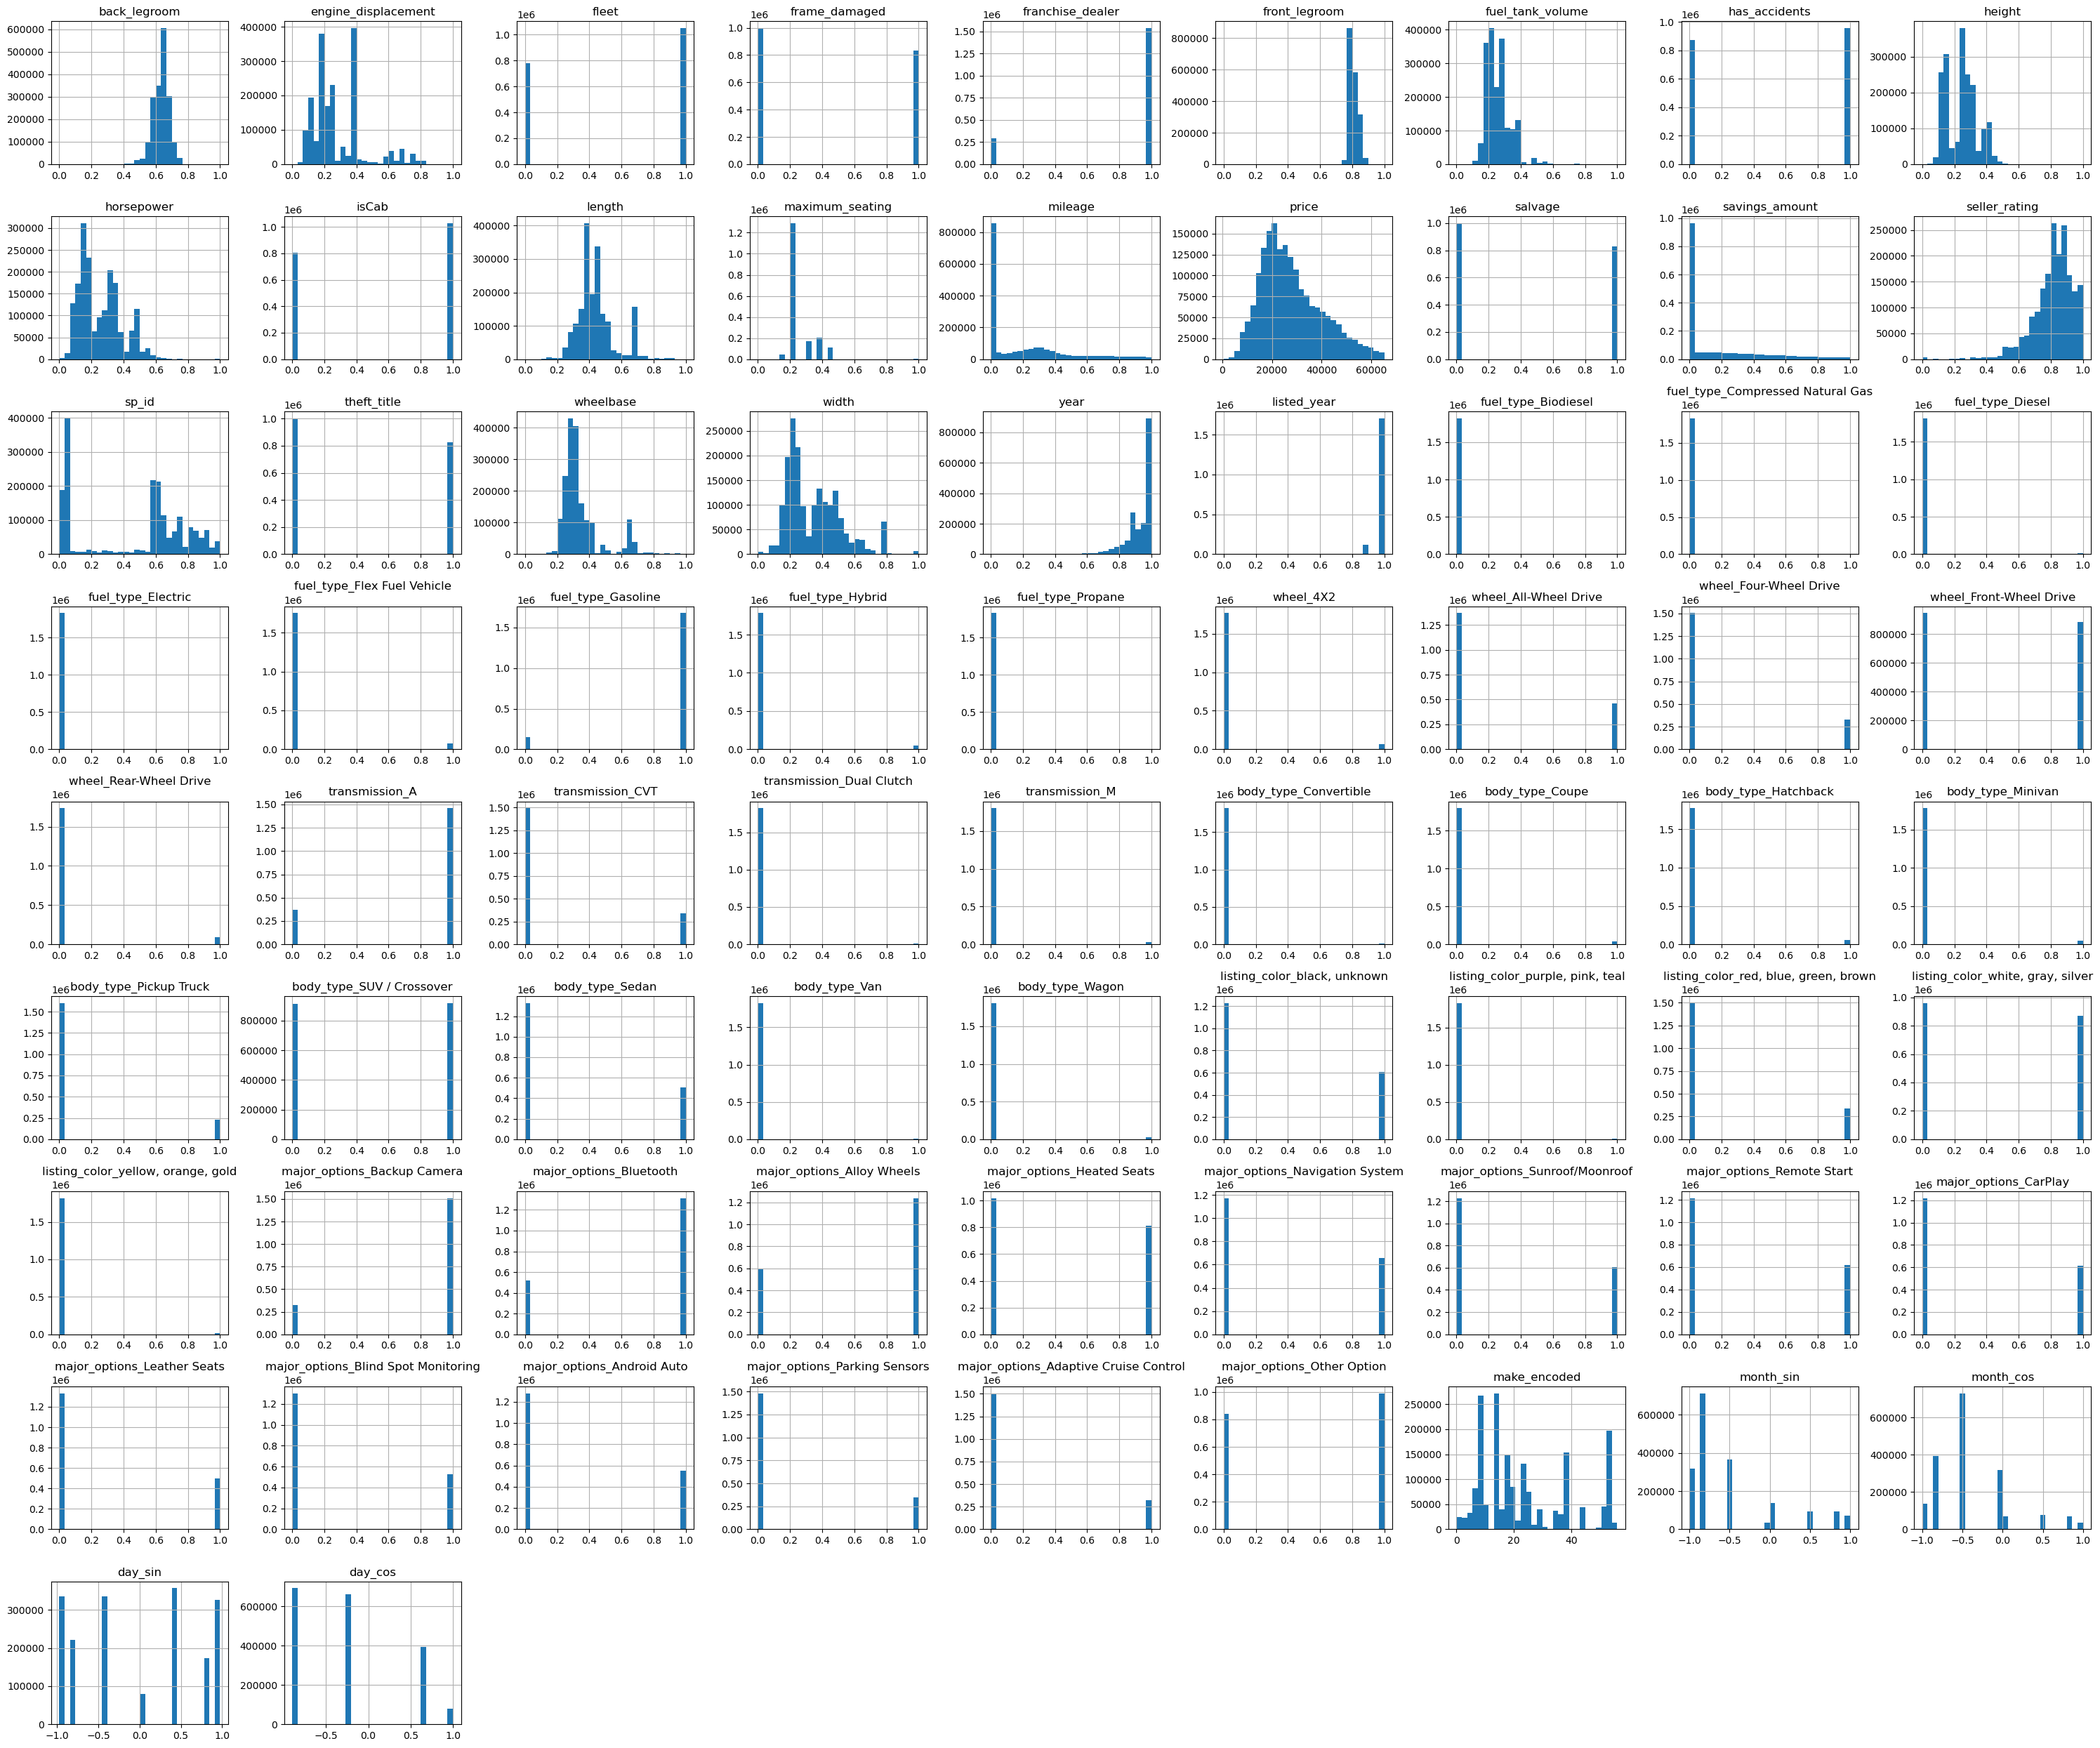

In [102]:
tf_df.hist(bins=30, figsize=(30, 25))
plt.tight_layout()
plt.show()

In [103]:
target = 'price'
X = tf_df.drop(columns=[target])
y = tf_df[target]

# Split into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Testataan ensin yksinkertaisella mallilla 

In [104]:
inputs = Input(shape=(X_train.shape[1],))

x = Dense(128, activation='relu')(inputs) 
x = Dense(64, activation='relu')(x)      
x = Dense(32, activation='relu')(x)       
x = Dropout(0.2)(x)                      
outputs = Dense(1, activation='linear')(x)

In [105]:
model = Model(inputs=inputs, outputs=outputs)


In [106]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [107]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 73)]              0         
                                                                 
 dense_33 (Dense)            (None, 128)               9472      
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_36 (Dense)            (None, 1)                 33        
                                                                 
Total params: 19,841
Trainable params: 19,841
Non-trainable

In [108]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
22881/22881 [==============================] - 25s 1ms/step - loss: 53013352.0000 - mae: 5204.5405 - val_loss: 17847340.0000 - val_mae: 3030.2710
Epoch 2/20
22881/22881 [==============================] - 25s 1ms/step - loss: 36485208.0000 - mae: 4454.7422 - val_loss: 15646093.0000 - val_mae: 2854.0049
Epoch 3/20
22881/22881 [==============================] - 25s 1ms/step - loss: 34901556.0000 - mae: 4357.0317 - val_loss: 14631494.0000 - val_mae: 2763.4541
Epoch 4/20
22881/22881 [==============================] - 25s 1ms/step - loss: 34202656.0000 - mae: 4309.9258 - val_loss: 13404264.0000 - val_mae: 2667.8318
Epoch 5/20
22881/22881 [==============================] - 25s 1ms/step - loss: 33735076.0000 - mae: 4279.7026 - val_loss: 15597418.0000 - val_mae: 2856.6411
Epoch 6/20
22881/22881 [==============================] - 25s 1ms/step - loss: 33368980.0000 - mae: 4250.3037 - val_loss: 12923525.0000 - val_mae: 2580.9089
Epoch 7/20
22881/22881 [==============================] - 

In [109]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

11441/11441 [==============================] - 8s 729us/step - loss: 10694504.0000 - mae: 2304.9932
Test Loss: 10694504.0, Test MAE: 2304.9931640625


In [110]:
y_pred = model.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

11441/11441 [==============================] - 7s 616us/step
R²: 0.9299035104246596


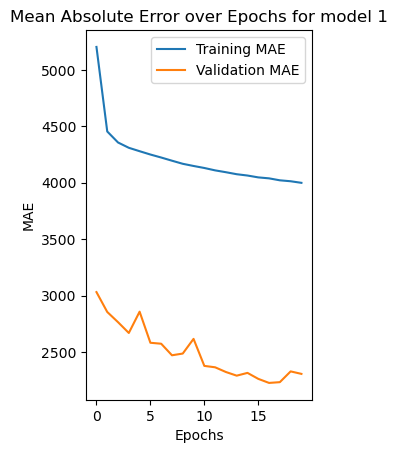

In [111]:
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error over Epochs for model 1')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

## Hieman monimutkaisempi malli

In [112]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_2 = Model(inputs=inputs, outputs=outputs)

In [113]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='mean_squared_error', metrics=['mae'])

In [114]:
history_2 = model_2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
45762/45762 [==============================] - 49s 1ms/step - loss: 28282030.0000 - mae: 3906.6440 - val_loss: 9925031.0000 - val_mae: 2235.3059
Epoch 2/10
45762/45762 [==============================] - 48s 1ms/step - loss: 28112602.0000 - mae: 3892.2334 - val_loss: 9394989.0000 - val_mae: 2225.6035
Epoch 3/10
45762/45762 [==============================] - 48s 1ms/step - loss: 28006768.0000 - mae: 3885.0930 - val_loss: 9138308.0000 - val_mae: 2172.2795
Epoch 4/10
45762/45762 [==============================] - 48s 1ms/step - loss: 27843214.0000 - mae: 3874.2229 - val_loss: 10052592.0000 - val_mae: 2241.7852
Epoch 5/10
45762/45762 [==============================] - 48s 1ms/step - loss: 27669468.0000 - mae: 3860.9658 - val_loss: 9094286.0000 - val_mae: 2163.4299
Epoch 6/10
45762/45762 [==============================] - 48s 1ms/step - loss: 27653500.0000 - mae: 3858.8596 - val_loss: 9605898.0000 - val_mae: 2240.7661
Epoch 7/10
45762/45762 [==============================] - 49s 1

In [115]:
loss, mae = model_2.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

11441/11441 [==============================] - 9s 743us/step - loss: 8368399.0000 - mae: 2086.8804
Test Loss: 8368399.0, Test MAE: 2086.88037109375


In [116]:
y_pred = model_2.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

11441/11441 [==============================] - 7s 613us/step
R²: 0.9451499067058338


In [117]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

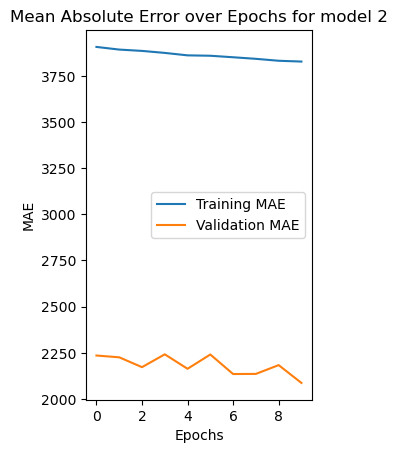

In [118]:
plt.subplot(1, 2, 2)
plt.plot(history_2.history['mae'], label='Training MAE')
plt.plot(history_2.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error over Epochs for model 2')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

## runnattu 100k datalla, muuten menee aika hankalaks

Best parameters: {'units': 64, 'learning_rate': 0.001}

In [119]:
'''
# Define the model-building function
def build_model(units=128, learning_rate=0.001):
    model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer for regression
    ])
    model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

# Wrap the model using KerasRegressor for compatibility with scikit-learn
model_3_regressor = KerasRegressor(build_fn=build_model, epochs=10, batch_size=32, verbose=0)

# Define the parameter grid for tuning
param_dist = {
    'units': [64, 128, 256],  # Number of units in the first layer
    'learning_rate': [1e-5, 1e-4, 1e-3, 1e-2],
}

# Create a custom scoring function (Mean Absolute Error in this case)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Apply RandomizedSearchCV with the model wrapped by KerasRegressor
search = RandomizedSearchCV(model_2_regressor, param_distributions=param_dist, n_iter=10, cv=3, scoring=mae_scorer)

# Fit the model
search.fit(X_train, y_train)

# Get the best model and parameters
best_model = search.best_estimator_
best_params = search.best_params_

print(f"Best parameters: {best_params}")
'''

'\n# Define the model-building function\ndef build_model(units=128, learning_rate=0.001):\n    model_3 = tf.keras.Sequential([\n        tf.keras.layers.Dense(units, activation=\'relu\', input_shape=(X_train.shape[1],)),\n        tf.keras.layers.Dense(64, activation=\'relu\'),\n        tf.keras.layers.Dense(32, activation=\'relu\'),\n        tf.keras.layers.Dense(1)  # Output layer for regression\n    ])\n    model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=\'mse\', metrics=[\'mae\'])\n    return model\n\n# Wrap the model using KerasRegressor for compatibility with scikit-learn\nmodel_3_regressor = KerasRegressor(build_fn=build_model, epochs=10, batch_size=32, verbose=0)\n\n# Define the parameter grid for tuning\nparam_dist = {\n    \'units\': [64, 128, 256],  # Number of units in the first layer\n    \'learning_rate\': [1e-5, 1e-4, 1e-3, 1e-2],\n}\n\n# Create a custom scoring function (Mean Absolute Error in this case)\nmae_scorer = make_scorer(mean

## Lisätään hieman monimutkaisempan malli kakoseen vielä learningrate_scheduler optimoimaan oppimisnopeutta

In [120]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
history_with_lr_scheduler = model_2.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])




Epoch 1/30
45762/45762 [==============================] - 48s 1ms/step - loss: 27151696.0000 - mae: 3824.1055 - val_loss: 9436546.0000 - val_mae: 2205.1340 - lr: 0.0010
Epoch 2/30
45762/45762 [==============================] - 49s 1ms/step - loss: 27061462.0000 - mae: 3816.6423 - val_loss: 9237936.0000 - val_mae: 2166.0234 - lr: 0.0010
Epoch 3/30
45762/45762 [==============================] - 48s 1ms/step - loss: 26929594.0000 - mae: 3809.7075 - val_loss: 8962090.0000 - val_mae: 2133.6934 - lr: 0.0010
Epoch 4/30
45762/45762 [==============================] - 49s 1ms/step - loss: 26892624.0000 - mae: 3805.2649 - val_loss: 8555892.0000 - val_mae: 2111.7024 - lr: 0.0010
Epoch 5/30
45762/45762 [==============================] - 49s 1ms/step - loss: 26802712.0000 - mae: 3800.6431 - val_loss: 8492716.0000 - val_mae: 2105.8152 - lr: 0.0010
Epoch 6/30
45762/45762 [==============================] - 48s 1ms/step - loss: 26747164.0000 - mae: 3796.3669 - val_loss: 8353611.0000 - val_mae: 2068.9070

In [121]:
loss, mae = model_2.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

11441/11441 [==============================] - 8s 739us/step - loss: 7757857.5000 - mae: 1988.4697
Test Loss: 7757857.5, Test MAE: 1988.4697265625


In [122]:
y_pred_2 = model_2.predict(X_test)
r2_2 = r2_score(y_test, y_pred_2)
print(f"R² for model_2 with optimized LR: {r2_2}")

11441/11441 [==============================] - 7s 622us/step
R² for model_2 with optimized LR: 0.9491517516590732


## Mean Absolute Error noin 2000€ eli malli ennustaa auton hinnan keskimäärin 2000€ päähän

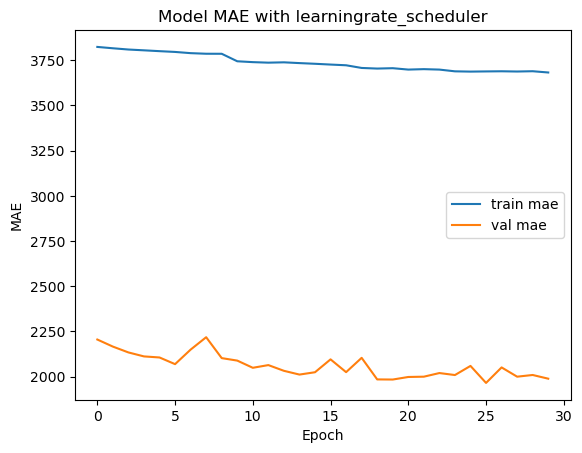

In [123]:
plt.plot(history_with_lr_scheduler.history['mae'], label='train mae')
plt.plot(history_with_lr_scheduler.history['val_mae'], label='val mae')
plt.title('Model MAE with learningrate_scheduler')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Testataan L2 reguliarizationia

### mahdollisesti pienentää overfitting riskiä

#### Käytössä myös aijempi Learningrate_reschechueler

In [124]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(1)
])



In [125]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='mean_squared_error', metrics=['mae'])

In [126]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
history_4 = model_3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

Epoch 1/50
45762/45762 [==============================] - 56s 1ms/step - loss: 18943332.0000 - mae: 3035.4114 - val_loss: 12646094.0000 - val_mae: 2559.9309 - lr: 0.0010
Epoch 2/50
45762/45762 [==============================] - 55s 1ms/step - loss: 11786153.0000 - mae: 2491.7600 - val_loss: 10786993.0000 - val_mae: 2378.7703 - lr: 0.0010
Epoch 3/50
45762/45762 [==============================] - 55s 1ms/step - loss: 10580098.0000 - mae: 2356.6938 - val_loss: 10262391.0000 - val_mae: 2284.7729 - lr: 0.0010
Epoch 4/50
45762/45762 [==============================] - 55s 1ms/step - loss: 9877423.0000 - mae: 2276.1799 - val_loss: 9255245.0000 - val_mae: 2197.0723 - lr: 0.0010
Epoch 5/50
45762/45762 [==============================] - 55s 1ms/step - loss: 9450681.0000 - mae: 2225.3364 - val_loss: 9659140.0000 - val_mae: 2275.8848 - lr: 0.0010
Epoch 6/50
45762/45762 [==============================] - 55s 1ms/step - loss: 9123774.0000 - mae: 2185.1978 - val_loss: 9341342.0000 - val_mae: 2269.0630

In [127]:
loss, mae = model_3.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

11441/11441 [==============================] - 9s 775us/step - loss: 6047093.0000 - mae: 1768.4091
Test Loss: 6047093.0, Test MAE: 1768.4090576171875


In [128]:
y_pred = model_3.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

11441/11441 [==============================] - 8s 654us/step
R²: 0.9603716262612955


In [129]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

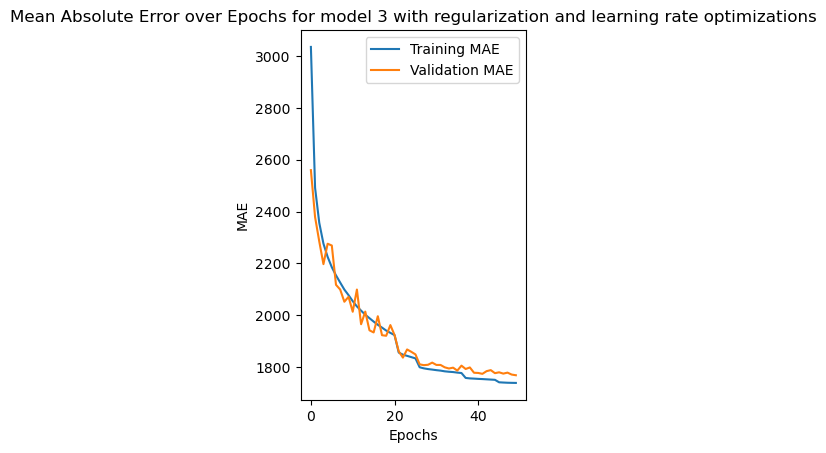

In [130]:
plt.subplot(1, 2, 2)
plt.plot(history_4.history['mae'], label='Training MAE')
plt.plot(history_4.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error over Epochs for model 3 with regularization and learning rate optimizations')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

## Testataan myös advanced optimizeria Nadam

### Pidetään myös aijemmat LRS ja  L2 regularization

In [131]:
model_3.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001), loss='mse', metrics=['mae'])


In [132]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
history_5 = model_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

Epoch 1/10
45762/45762 [==============================] - 59s 1ms/step - loss: 6614857.0000 - mae: 1862.2440 - val_loss: 6541441.5000 - val_mae: 1847.4954 - lr: 0.0010
Epoch 2/10
45762/45762 [==============================] - 57s 1ms/step - loss: 6601607.5000 - mae: 1859.2958 - val_loss: 6611668.5000 - val_mae: 1856.3175 - lr: 0.0010
Epoch 3/10
45762/45762 [==============================] - 57s 1ms/step - loss: 6569257.0000 - mae: 1854.8046 - val_loss: 6779919.0000 - val_mae: 1869.2250 - lr: 0.0010
Epoch 4/10
45762/45762 [==============================] - 57s 1ms/step - loss: 6539999.5000 - mae: 1851.1100 - val_loss: 6652928.5000 - val_mae: 1863.1560 - lr: 0.0010
Epoch 5/10
45762/45762 [==============================] - 57s 1ms/step - loss: 6509437.5000 - mae: 1846.2081 - val_loss: 6542832.5000 - val_mae: 1841.5719 - lr: 0.0010
Epoch 6/10
45725/45762 [============================>.] - ETA: 0s - loss: 6477201.5000 - mae: 1841.9476
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0

In [133]:
loss, mae = model_2.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

11441/11441 [==============================] - 8s 730us/step - loss: 7757857.5000 - mae: 1988.4697
Test Loss: 7757857.5, Test MAE: 1988.4697265625


In [134]:
y_pred = model_3.predict(X_test)

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

11441/11441 [==============================] - 7s 649us/step
R²: 0.9596255171269036


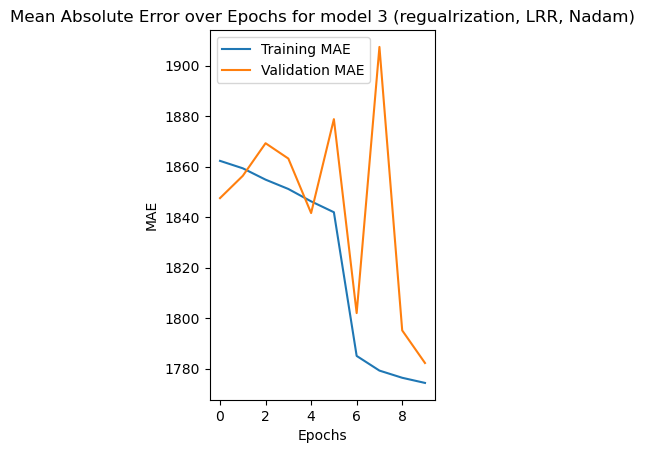

In [135]:
plt.subplot(1, 2, 2)
plt.plot(history_5.history['mae'], label='Training MAE')
plt.plot(history_5.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error over Epochs for model 3 (regualrization, LRR, Nadam)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

Nähdään kuvaajasta Nadam opimazerin käyttämisen olevan tarpeetonta, tämä vaikuttaa malliin negatiivisesti